# Agenda
- Introduction to supervised Learning
- Supervised Learning Algorithms
- Classification
- Regression
- OverFitting and Underfitting

#### Introduction to supervised Learning

Supervised Learning is a type of ML where the algorithm learns from labelled data. 


#### Supervised Learning Algorithms
- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine

### Preparation and Shaping of the data

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('titanic.csv')

In [93]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [95]:
df.groupby(['Embarked'])['Fare'].mean()

Embarked
C    59.954144
Q    13.276030
S    27.079812
Name: Fare, dtype: float64

In [96]:
df.groupby(['Embarked'])['Fare'].count()

Embarked
C    168
Q     77
S    644
Name: Fare, dtype: int64

In [97]:
df.groupby(['Embarked', 'Survived'])['Fare'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Fare, dtype: int64

In [98]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [99]:
# Data Preprocessing.
# Create a Column by the name TravelAlone which would have 0 or 1 as values if a person is without any sibsp and parch

In [100]:
df['TravelAlone'] = np.where((df['SibSp']+df['Parch'])>0,False,True).astype('uint8')

In [101]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


In [102]:
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [103]:
#'Heikkinen, Miss. Laina'.split(',')[1].split('.')[0].strip()

In [104]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TravelAlone', 'Title'],
      dtype='object')

In [105]:
df = df[['PassengerId',  'Pclass', 'Title','Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'TravelAlone','Survived' ]]

In [106]:
df.head()

,PassengerId,Pclass,Title,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,TravelAlone,Survived
0,1,3,Mr,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,3,Miss,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,3,Mr,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [107]:
# Dropping Unnecessary columns

In [108]:
df.drop(columns= ['PassengerId','Name', 'SibSp','Parch', 'Ticket', 'Cabin' ], inplace = True)

In [109]:
df.head()

,Pclass,Title,Sex,Age,Fare,Embarked,TravelAlone,Survived
0,3,Mr,male,22.0,7.2500,S,0,0
1,1,Mrs,female,38.0,71.2833,C,0,1
2,3,Miss,female,26.0,7.9250,S,1,1
3,1,Mrs,female,35.0,53.1000,S,0,1
4,3,Mr,male,35.0,8.0500,S,1,0


In [110]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [111]:
# Missing Values

In [112]:
df.isnull().sum()

Pclass           0
Title            0
Sex              0
Age            177
Fare             0
Embarked         2
TravelAlone      0
Survived         0
dtype: int64

In [113]:
df['Age'] = df.Age.fillna(df.Age.median())

In [114]:
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])

In [115]:
df.Embarked.mode()[0]

'S'

In [116]:
df.isnull().sum()

Pclass         0
Title          0
Sex            0
Age            0
Fare           0
Embarked       0
TravelAlone    0
Survived       0
dtype: int64

In [117]:
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [118]:
#Dated -  23 -06-2024

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df.head()

,Pclass,Title,Sex,Age,Fare,Embarked,TravelAlone,Survived
0,3,Mr,male,22.0,7.2500,S,0,0
1,1,Mrs,female,38.0,71.2833,C,0,1
2,3,Miss,female,26.0,7.9250,S,1,1
3,1,Mrs,female,35.0,53.1000,S,0,1
4,3,Mr,male,35.0,8.0500,S,1,0


In [120]:
newdf =  pd.get_dummies(df, columns= ['Pclass','Title', 'Sex', 'Embarked'], dtype = 'int')

In [121]:
newdf

,Age,Fare,TravelAlone,Survived,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
2,26.0,7.9250,1,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,35.0,53.1000,0,1,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
4,35.0,8.0500,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,13.0000,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
887,19.0,30.0000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
888,28.0,23.4500,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
889,26.0,30.0000,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [122]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 891 non-null    float64
 1   Fare                891 non-null    float64
 2   TravelAlone         891 non-null    uint8  
 3   Survived            891 non-null    int64  
 4   Pclass_1            891 non-null    int32  
 5   Pclass_2            891 non-null    int32  
 6   Pclass_3            891 non-null    int32  
 7   Title_Capt          891 non-null    int32  
 8   Title_Col           891 non-null    int32  
 9   Title_Don           891 non-null    int32  
 10  Title_Dr            891 non-null    int32  
 11  Title_Jonkheer      891 non-null    int32  
 12  Title_Lady          891 non-null    int32  
 13  Title_Major         891 non-null    int32  
 14  Title_Master        891 non-null    int32  
 15  Title_Miss          891 non-null    int32  
 16  Title_Ml

In [123]:
# Prepare Features and Target variables

In [124]:
X = newdf.drop(columns = ['Survived'])
y = newdf['Survived']

In [125]:
X.columns

Index(['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Title_Capt', 'Title_Col', 'Title_Don', 'Title_Dr', 'Title_Jonkheer',
       'Title_Lady', 'Title_Major', 'Title_Master', 'Title_Miss', 'Title_Mlle',
       'Title_Mme', 'Title_Mr', 'Title_Mrs', 'Title_Ms', 'Title_Rev',
       'Title_Sir', 'Title_the Countess', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

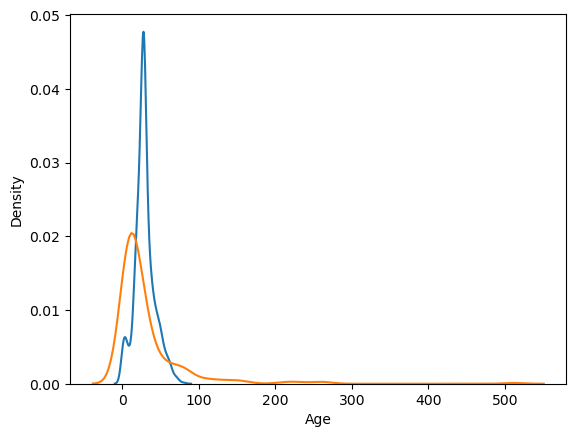

In [126]:
for col in ['Age', 'Fare']:
    sns.kdeplot(x = col, data = newdf)
plt.show()

In [127]:
X[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,29.361582,32.204208
std,13.019697,49.693429
min,0.420000,0.000000
25%,22.000000,7.910400
50%,28.000000,14.454200
75%,35.000000,31.000000
max,80.000000,512.329200


In [128]:
# Perform Normalization (MinMaxScaler)  Perform Standardization(Standard Scaler)

In [129]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [130]:
mm = MinMaxScaler()
trans_X = mm.fit_transform(X)
trans_X = pd.DataFrame(trans_X, columns = X.columns)

In [131]:
trans_X

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.271174,0.014151,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.472229,0.139136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.321438,0.015469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.434531,0.103644,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.434531,0.015713,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.334004,0.025374,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
887,0.233476,0.058556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
888,0.346569,0.045771,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,0.321438,0.058556,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [132]:
trans_X[['Age', 'Fare']].describe()

,Age,Fare
count,891.000000,891.000000
mean,0.363679,0.062858
std,0.163605,0.096995
min,0.000000,0.000000
25%,0.271174,0.015440
50%,0.346569,0.028213
75%,0.434531,0.060508
max,1.000000,1.000000


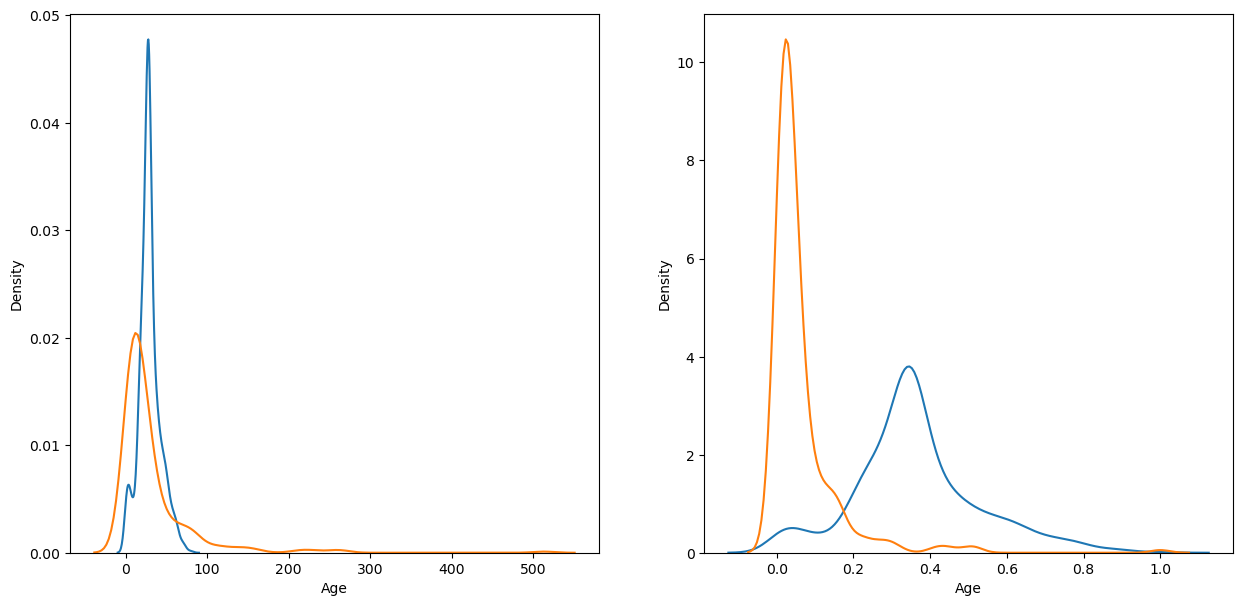

In [133]:
plt.figure(figsize = (15,7))
for col in ['Age', 'Fare']:
    plt.subplot(1,2,1)
    sns.kdeplot(x = col, data = X)
    plt.subplot(1,2,2)
    sns.kdeplot(x = col, data = trans_X)
plt.show()

In [134]:
sc = StandardScaler()
trans_X_sc = sc.fit_transform(trans_X)
trans_X_sc = pd.DataFrame(trans_X_sc, columns = X.columns)
trans_X_sc

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Title_Capt,Title_Col,Title_Don,Title_Dr,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-0.565736,-0.502445,-1.231645,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,0.663861,0.786845,-1.231645,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,2.475480,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,-0.258337,-0.488854,0.811922,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,0.433312,0.420730,-1.231645,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,2.475480,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.433312,-0.486337,0.811922,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.181487,-0.386671,0.811922,-0.565685,1.960202,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,12.144958,-0.03352,-0.03352,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-0.796286,-0.044381,0.811922,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,-0.104637,-0.176263,-1.231645,-0.565685,-0.510152,0.902587,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-0.258337,-0.044381,0.811922,1.767767,-0.510152,-1.107926,-0.03352,-0.047431,-0.03352,-0.088986,...,-0.403962,-0.03352,-0.082339,-0.03352,-0.03352,-0.737695,0.737695,2.074505,-0.307562,-1.623803


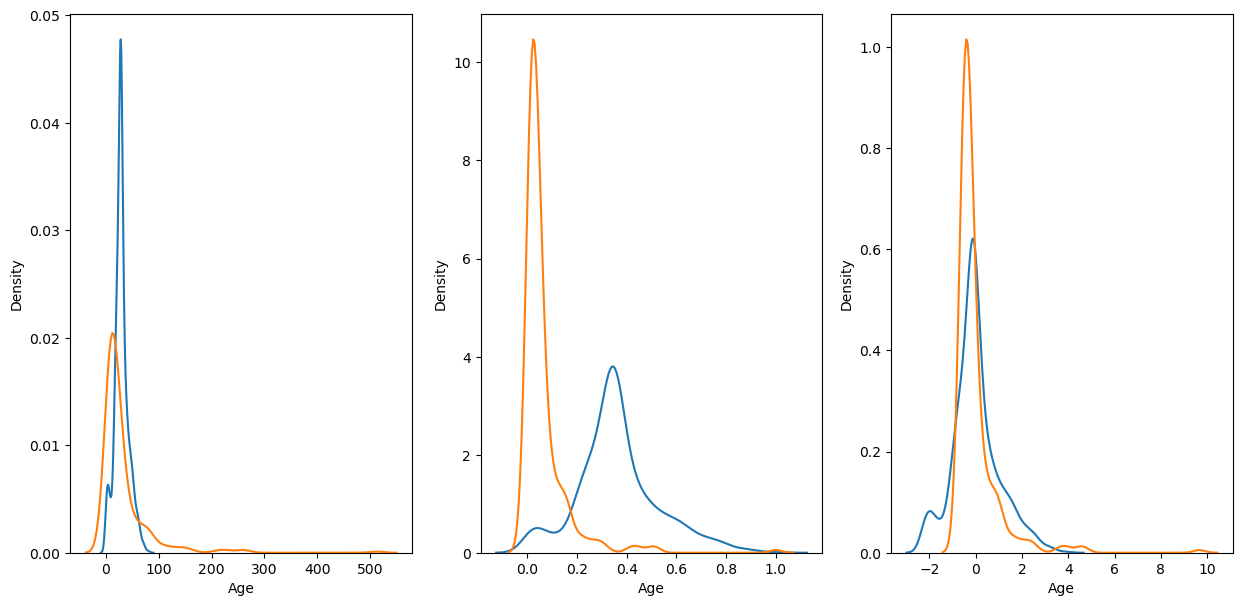

In [135]:
plt.figure(figsize = (15,7))
for col in ['Age', 'Fare']:
    plt.subplot(1,3,1)
    sns.kdeplot(x = col, data = X)
    plt.subplot(1,3,2)
    sns.kdeplot(x = col, data = trans_X)
    plt.subplot(1,3,3)
    sns.kdeplot(x = col, data = trans_X_sc)
    
plt.show()

In [136]:
trans_X_sc[['Age', 'Fare']].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,1.913920e-16,1.196200e-17
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


In [137]:
X = trans_X_sc
y= y

# Supervised Learning Algorithms

There are 2 types of Supervised Learning Algorithms
- Classification
    - it is a supervised learning technique to identify the category of a new observations based on training data(predicting category). eg. email spam filter
- Regression 
    - it is a supervised learning technique to predict a continuous values, eg. predict price of house in a particular area.    
    

In [139]:
# Overfitting and Underfitting

# Detecting and Preventing Overfitting and underfitting 

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')